In [101]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import math

data = pd.read_csv('PUBGdata_rå.csv', delimiter=";")
data['kills_per_mand'] = data['kills_total']/data['antal_spillere']
data['spil_farve'] = [
    'green' if i==1
    else 'gold' if i==2
    else 'red' if i==3
    else 'cornflowerblue'
    for i in data['plads']
]

data['spil_størrelse'] = [
    100 if i==1
    else 50 if i==2
    else 30 if i==3
    else 10
    for i in data['plads']
]

data['antal_spillere_farve'] = [
    'r' if i==3
    else 'b' if i==2
    else 's'
    for i in data['antal_spillere']
]

mvgavg = pd.DataFrame(np.transpose(np.convolve(data['kills_per_mand'], np.ones((50,))/50, mode='full')))
data['moving_avg'] = mvgavg

gennemsnit = data.groupby('dag').agg(
    Average_Kills_Per_Mand = ('kills_per_mand','mean'),
    Antal_spil = ('spil',max)
)


data['dailyavg'] = [
    gennemsnit['Average_Kills_Per_Mand'][1] if i==1
    else gennemsnit['Average_Kills_Per_Mand'][2] if i==2
    else gennemsnit['Average_Kills_Per_Mand'][3] if i==3
    else gennemsnit['Average_Kills_Per_Mand'][4] if i==4
    else gennemsnit['Average_Kills_Per_Mand'][5] if i==5
    else gennemsnit['Average_Kills_Per_Mand'][6] if i==6
    else gennemsnit['Average_Kills_Per_Mand'][7] if i==7
    else gennemsnit['Average_Kills_Per_Mand'][8] if i==8
    else gennemsnit['Average_Kills_Per_Mand'][9] if i==9
    else gennemsnit['Average_Kills_Per_Mand'][10] if i==10
    else 0
    for i in data['dag']
]

data


,spil,kills_total,antal_spillere,plads,dag,ekstra_spiller,kills_per_mand,spil_farve,spil_størrelse,antal_spillere_farve,moving_avg,dailyavg
0,1,2,2,0,1,0,1.000000,cornflowerblue,10,b,0.020000,0.857143
1,2,0,2,0,1,0,0.000000,cornflowerblue,10,b,0.020000,0.857143
2,3,2,2,0,1,0,1.000000,cornflowerblue,10,b,0.040000,0.857143
3,4,3,2,0,1,0,1.500000,cornflowerblue,10,b,0.070000,0.857143
4,5,0,2,0,1,0,0.000000,cornflowerblue,10,b,0.070000,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,5,3,0,9,kenneth,1.666667,cornflowerblue,10,r,1.383333,1.453333
197,198,3,3,0,9,kenneth,1.000000,cornflowerblue,10,r,1.373333,1.453333
198,199,6,3,0,9,kenneth,2.000000,cornflowerblue,10,r,1.413333,1.453333
199,200,2,3,0,9,kenneth,0.666667,cornflowerblue,10,r,1.396667,1.453333


In [102]:
#OLS med Pythonpakke - virker det?
import statsmodels.api as sm


model = sm.OLS(data['kills_per_mand'],data['spil'])
results = model.fit()
results.params



spil    0.008623
dtype: float64

In [103]:
#Prøver at lave OLS manuelt:
#Definerer de kvadrerede afvigelser
gns_y = np.mean(data['kills_per_mand'])
gns_x = np.mean(data['spil'])

afvigelser_y = []
for i in data['kills_per_mand']:
    afvigelser_y.append(i-gns_y)

afvigelser_x = []
for i in data['spil']: 
    afvigelser_x.append(i-gns_x)

df_afvigelser_y = pd.DataFrame(afvigelser_y)
df_afvigelser_x = pd.DataFrame(afvigelser_x)

df_tæller_i = df_afvigelser_x*df_afvigelser_y
df_nævner_i = df_afvigelser_x**2

sum_tæller = np.sum(df_tæller_i)
sum_nævner = np.sum(df_nævner_i)

beta = sum_tæller/sum_nævner

beta
#Passer det?

0    0.004802
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

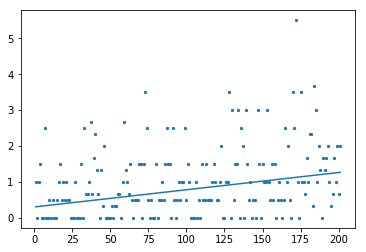

In [106]:
data['OLS'] = 0.004802*data['spil']

plt.scatter(data['spil'],data['kills_per_mand'], s=5)
plt.plot(data['spil'],data['OLS'] + 0.3)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

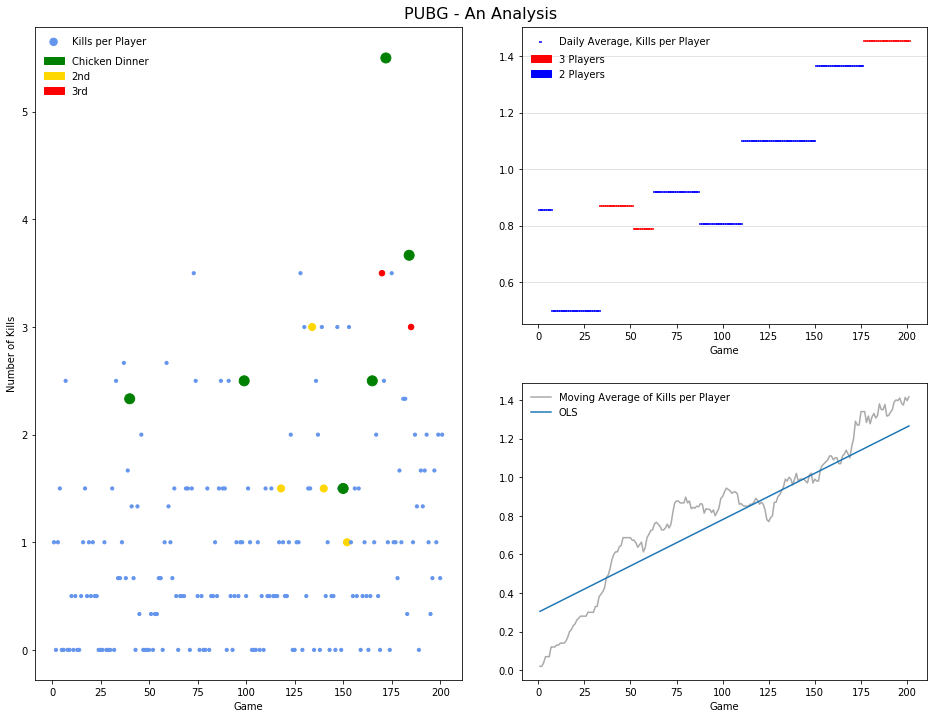

In [105]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

green_patch = mpatches.Patch(color='green', label='Chicken Dinner')
yellow_patch = mpatches.Patch(color='gold', label='2nd')
red_patch = mpatches.Patch(color='red', label='3rd')

#Laver figuren som helhed:
fig = plt.figure(figsize=(16,12), frameon=False)
title_font = {'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
plt.title('PUBG - An Analysis',**title_font)

#Laver figur 1
plt.axis('off')
ax = fig.add_subplot(1,4,(1,2))
plt.scatter(data['spil'],data['kills_per_mand'], s=data['spil_størrelse'], label='Kills per Player', c=data['spil_farve'])
plt.tick_params()
plt.xlabel('Game')
plt.ylabel('Number of Kills')
legend1 = plt.legend(handles=[green_patch,yellow_patch,red_patch], loc='upper left', frameon=False, bbox_to_anchor=(0,0.97))
legend2 = plt.legend(loc='upper left', frameon=False)
ax.add_artist(legend1)

#Laver figur 2:
redpatch = mpatches.Patch(color='r', label='3 Players')
bluepatch = mpatches.Patch(color='b', label='2 Players')

ax = fig.add_subplot(2,2,2)
plt.scatter(data['spil'],data['dailyavg'], s=10, marker='_', label='Daily Average, Kills per Player',c=data['antal_spillere_farve'])
legend1 = plt.legend(handles=[redpatch, bluepatch], loc='upper left', frameon=False, bbox_to_anchor=(0,0.94))
plt.legend(frameon=False)
ax.add_artist(legend1)
plt.grid(axis='y',c='gainsboro')
plt.xlabel('Game')

#Laver figur 3:
ax = fig.add_subplot(2,2,4)
plt.plot(data['spil'],data['moving_avg'],c='darkgrey',label='Moving Average of Kills per Player')
plt.plot(data['spil'],data['OLS']+0.3)
plt.legend(frameon=False)
plt.xlabel('Game')


plt.savefig('Own.pdf')
plt.show











